# Задание к занятию «Python для анализа данных: pandas»

In [1]:
import pandas as pd

## Задание 1
Используем файл keywords.csv.
 
Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим 'undefined'.
 
Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:
```
geo_data = {
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}
```
Результат классификации запишите в отдельный столбец region.

In [2]:
def geo_classificator(keyword, geo_classes_data):
    '''Гео-классификатор, который основываясь на данных в keyword классифицирует
    на принадлежность к одному из регион. Информация о ключевых словах, принаждежности
    к тому или иному региону находится в geo_classes_data
    Пример: 
    geo_classes_data = {
        'Центр': ['москва', 'тула', 'ярославль'],
        'Северо-Запад': ['петербург', 'псков', 'мурманск'],
        'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
    }
    -------------------------------
        keyword    |      output
    -------------------------------
    москва мрт     |   Центр
    ботинки        |   undefined
    псков музеи    |   Северо-Запад
    '''
    for region, region_selector in geo_classes_data.items():
        for word in keyword.split(' '):
            if word in region_selector:
                return region
    return 'undedined'
    

In [3]:
keywords_df = pd.read_csv('./keywords.csv')
keywords_df.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [4]:
# Классифицируем по регионам (примечание: мапа может быть расширена другими регионами)
keywords_df['region'] = keywords_df['keyword'].apply(geo_classificator, geo_classes_data={
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
})

In [5]:
# Вывод, чтобы показать что все работает
keywords_df['region'].value_counts()

undedined         99406
Центр               384
Северо-Запад        146
Дальний Восток       64
Name: region, dtype: int64

## Задание 2

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:

- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [6]:
def rating_classificator(rating):
    '''Классифицирует по рейтингу'''
    if rating <= 2:
        return 'низкий рейтинг'
    elif rating < 4.5:
        return 'средний рейтинг'
    elif rating <= 5.0:
        return 'высокий рейтинг'
    return 'undefined'

In [7]:
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [8]:
# Классифицируем фильмы по рейтингу
ratings_df['class'] = ratings_df['rating'].apply(rating_classificator)

In [9]:
# Вывод, чтобы показать что все работает
ratings_df['class'].value_counts()

средний рейтинг    63801
высокий рейтинг    22818
низкий рейтинг     13385
Name: class, dtype: int64

## Задание 3

Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.

In [10]:
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [11]:
# Cчитаем какому количеству фильмов поставил оценку каждый пользователь
film_ratings = ratings_df.groupby('userId').count().reset_index()[['userId', 'movieId']]
film_ratings.head()

,userId,movieId
0,1,20
1,2,76
2,3,51
3,4,204
4,5,100


In [12]:
# Фильтруем список, оставляем только тех кто поставил более 100 оценок
film_fans_ratings = film_ratings[ film_ratings['movieId'] >= 100 ]
film_fans_ratings_ids = film_fans_ratings['userId'].tolist()
film_fans_ratings_ids[:5]

[4, 5, 8, 15, 17]

In [13]:
# Список с активными пользователями а также максимально и мимальное время оценки
fans_max_min_timestamp = ratings_df[
    ratings_df['userId'].isin(film_fans_ratings_ids)
].groupby('userId').agg(
    {'timestamp': ['max', 'min']}
)['timestamp'].reset_index()
fans_max_min_timestamp.head()

,userId,max,min
0,4,949982274,949778714
1,5,1163375145,1163373044
2,8,1154474527,1154389340
3,15,1469330735,997937239
4,17,1127476640,1127468587


In [14]:
mean_fans_lifetime = fans_max_min_timestamp.apply(
    lambda x: x['max'] - x['min'], axis=1).mean() / 3600 / 25
print('Среднее время жизни киноманов: %.0f дня' %(mean_fans_lifetime))

Среднее время жизни киноманов: 437 дня


## Задание 4

Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:


- для каждой строки пройдите по всем годам списка years
- если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
- если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год


3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга

In [15]:
movies_df = pd.read_csv('ml-latest-small/movies.csv')[['movieId', 'title']]
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [16]:
def production_year(title, years):
    '''Получение года производства фильма по названию.
    Учитываются фильмы, даты которых находнятся в years, остальные получают 1900 год
    '''
    for year in years:
        if str(year) in title:
            return year;
    return 1900

In [17]:
# Для каждого фильма получаем дату его производства 
movies_df['year'] = movies_df['title'].apply(production_year, years = range(1950, 2011))
movies_df.head()

,movieId,title,year
0,1,Toy Story (1995),1995
1,2,Jumanji (1995),1995
2,3,Grumpier Old Men (1995),1995
3,4,Waiting to Exhale (1995),1995
4,5,Father of the Bride Part II (1995),1995


In [18]:
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [19]:
# Считаем средний рейтинг для каждого фильма
mean_rating_df = ratings_df.groupby('movieId').agg({'rating': 'mean'}).reset_index()
mean_rating_df.head()

,movieId,rating
0,1,3.872470
1,2,3.401869
2,3,3.161017
3,4,2.384615
4,5,3.267857


In [20]:
# Join'им табицу с фильмами к таблице с рейтинами и составляем новый датафрейм с
# годом производства и рейтингом
year_rating_df = mean_rating_df.merge(movies_df, how = 'left', on = 'movieId')[['year', 'rating']]
year_rating_df.head()

,year,rating
0,1995,3.872470
1,1995,3.401869
2,1995,3.161017
3,1995,2.384615
4,1995,3.267857


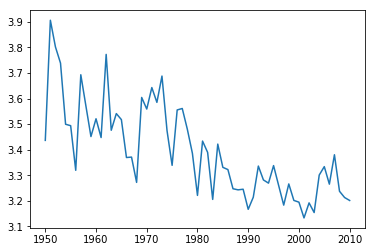

In [23]:
# Бонус: нарисуем распределение среднего рейтинга по годам

# 1. Считаем рейтинг по годам, сортируем, отбрасываем 1900 год
year_mean_rating = year_rating_df.groupby(
    'year'
).mean().sort_values(by = 'year').reset_index().loc[1:]

# 2. Рисуем 
import matplotlib.pyplot as plt
plt.plot(year_mean_rating['year'], year_mean_rating['rating'])

In [22]:
# Решение самого задания
year_rating_df.groupby(
    'year'
).mean().sort_values(by = 'rating', ascending = False).reset_index()

,year,rating
0,1951,3.906653
1,1952,3.802318
2,1962,3.772962
3,1953,3.738878
4,1957,3.693322
5,1973,3.688212
6,1971,3.643227
7,1969,3.604509
8,1972,3.585295
9,1958,3.571956
